<a href="https://colab.research.google.com/github/mongbro/TIL/blob/master/2_Fashion_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras CNN으로 패션 아이템 구분하기

1. 패키지 수입 및 파라미터 지정

In [1]:
# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D, Conv2D, InputLayer

In [2]:
# 파라미터 지정
MY_EPOCH = 10
MY_BATCH = 500


2.데이터 불러오기

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('학습용 입력 데이터 :', X_train.shape)
print('학습용 출력 데이터 :', Y_train.shape)
print('평가용 입력 데이터 :', X_test.shape)
print('평가용 출력 데이터 :', Y_test.shape)

학습용 입력 데이터 : (60000, 28, 28)
학습용 출력 데이터 : (60000,)
평가용 입력 데이터 : (10000, 28, 28)
평가용 출력 데이터 : (10000,)


학습용 데이터 첫번째 이미지 화소 정보
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

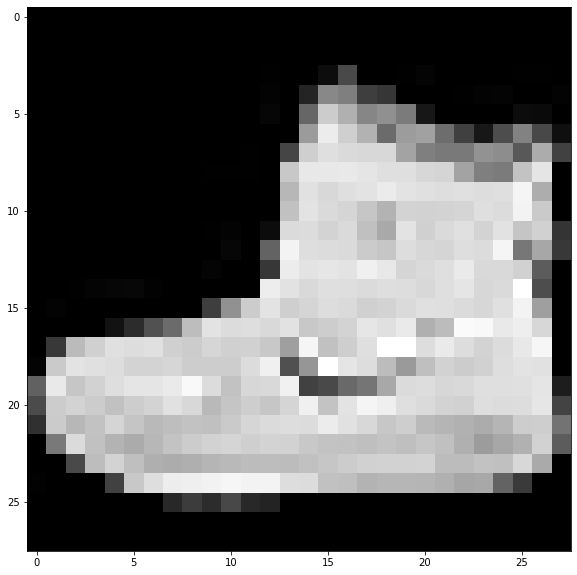

In [4]:
# 데이터 샘플 출력
print('학습용 데이터 첫번째 이미지 화소 정보')
print(X_train[0])
plt.figure(figsize = (10, 10))
plt.imshow(X_train[0], cmap = 'gray')
print('학습용 데이터 첫번째 이미지의 라벨 : ', Y_train[0])

In [5]:
# 데이터 스케일링
X_train = X_train / 255.0
X_test = X_test / 255.0

# 데이터 모양 정보 전환 ( == 이미지 채널 정보 추가)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
        # (6000, 28, 28) 3차원 => (60000, 28, 28, 1) 4차원   마지막 1은 채널정보

In [6]:
# 라벨 정보 수정
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
                    # categorical => one hot encoding 하는 것
print('학습용 데이터 첫번째 이미지의 라벨 : ', Y_train[0])


print('학습용 입력 데이터 :', X_train.shape)
print('학습용 출력 데이터 :', Y_train.shape)
print('평가용 입력 데이터 :', X_test.shape)
print('평가용 출력 데이터 :', Y_test.shape)

학습용 데이터 첫번째 이미지의 라벨 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
학습용 입력 데이터 : (60000, 28, 28, 1)
학습용 출력 데이터 : (60000, 10)
평가용 입력 데이터 : (10000, 28, 28, 1)
평가용 출력 데이터 : (10000, 10)


3. 인공 신경망 구현

In [7]:
# CNN 구현
model = Sequential()
model.add(InputLayer(input_shape = (28,28,1)))

# 첫번째 합성곱 블록
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))

print('CNN 요약')
model.summary()

CNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
